# Installing Word Cloud

In [1]:
#!pip install wordcloud

# Generic Imports

In [2]:
# Generic Imports, Plot Beautification
import os
import io
import pathlib

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Loading Required Modules For Google Colab

In [3]:
#from google.colab import files

# Upload Dataset To Google Colab RunTime For Every New Instance

In [4]:
#uploaded = files.upload()

In [5]:
# MobRevdfRaw = pd.read_csv(io.BytesIO(uploaded['mobile_reviews.csv']))
# #print(MobRevdfRaw)
# #MobRevdfRaw.describe()
# MobRevdfRaw

# Upload the files to Google Drive and Link From Google Drive Instead of Uploading the files to run time for every session.

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

#_basepath_ = "/content/drive/MyDrive/Colab_Data/"

#MobRevdfRaw = pd.read_csv(_basepath_ + 'mobile_reviews.csv')

# Accessing The File From Local Drive In Jupyter NoteBook

In [7]:
MobRevdfRaw = pd.read_csv('mobile_reviews.csv')

In [8]:
MobRevdfCp = MobRevdfRaw.copy()

# Dropping First Column

In [9]:
# Drop first column of dataframe
MobRevdfCp = MobRevdfCp.iloc[: , 1:]

# Total Records/Rows

In [10]:
len(MobRevdfCp)

630594

# Data Set Information With Nulls

In [11]:
MobRevdfCp.isnull().sum()

Product Name       0
Reviews         1155
Rating             0
Sentiment          0
dtype: int64

# Removing Rows With Null Reviews Text As Null Percent Is Less

In [12]:
# selecting rows based on condition
MobRevdfCp = MobRevdfCp[MobRevdfCp['Reviews'].notnull()]

# Total Records/Rows

In [13]:
len(MobRevdfCp)

629439

# Data Set Information With Nulls

In [14]:
MobRevdfCp.isnull().sum()

Product Name    0
Reviews         0
Rating          0
Sentiment       0
dtype: int64

# Total Size

In [15]:
MobRevdfCp.size

2517756

# Total Nulls

In [16]:
MobRevdfCp.isnull().sum().sum() 

0

# Null Data Percentage

In [17]:
NullDataPercent = ((MobRevdfCp.isnull().sum().sum())/(MobRevdfCp.size))*100
NullDataPercent

0.0

# Shape Of DataSet

In [18]:
MobRevdfCp.shape

(629439, 4)

# Total Number Of Features & Target

In [19]:
MobRevdfCp.shape[1]

4

# Data Types

In [20]:
dataTypeSeries = MobRevdfCp.dtypes
print(dataTypeSeries)

Product Name    object
Reviews         object
Rating           int64
Sentiment       object
dtype: object


# Total Positive Review

In [21]:
len(MobRevdfCp[MobRevdfCp['Sentiment']=='POSITIVE'])

455840

# Total Neutral Review

In [22]:
len(MobRevdfCp[MobRevdfCp['Sentiment']=='NEUTRAL'])

50200

# Total Negative Review

In [23]:
len(MobRevdfCp[MobRevdfCp['Sentiment']=='NEGATIVE'])

123399

# Columns With Text

In [24]:
# Get  columns whose data type is object i.e. string
filteredColumns = MobRevdfCp.dtypes[MobRevdfCp.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfCatColumnNames = list(filteredColumns.index)
print("No of Columns With Text = ", len(listOfCatColumnNames))
print(listOfCatColumnNames)

No of Columns With Text =  3
['Product Name', 'Reviews', 'Sentiment']


<ipython-input-24-2b933155fd48>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filteredColumns = MobRevdfCp.dtypes[MobRevdfCp.dtypes == np.object]


# Columns With Numbers

In [25]:
# Get  columns whose data type is object i.e. string
filteredColumns = MobRevdfCp.dtypes[MobRevdfCp.dtypes != np.object]
# list of columns whose data type is object i.e. string
listOfNumeColumnNames = list(filteredColumns.index)
print("No of Columns With Numbers = ", len(listOfNumeColumnNames))
print(listOfNumeColumnNames)

No of Columns With Numbers =  1
['Rating']


<ipython-input-25-f2a83b582314>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filteredColumns = MobRevdfCp.dtypes[MobRevdfCp.dtypes != np.object]


# Data Set Information

In [26]:
MobRevdfCp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629439 entries, 0 to 630593
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Product Name  629439 non-null  object
 1   Reviews       629439 non-null  object
 2   Rating        629439 non-null  int64 
 3   Sentiment     629439 non-null  object
dtypes: int64(1), object(3)
memory usage: 24.0+ MB


# Printing Basic Information

In [27]:
print("There are {} observations and {} features in this dataset. \n".format(MobRevdfCp.shape[0],MobRevdfCp.shape[1]))

print("There are {} types of ratings in this dataset such as {}... \n".format(len(MobRevdfCp.Rating.unique()),", ".join(str(MobRevdfCp.Rating.unique()[0:5]))))

print("There are {} types of sentiments in this dataset such as {}... \n".format(len(MobRevdfCp.Sentiment.unique()),", ".join(MobRevdfCp.Sentiment.unique()[0:5])))

There are 629439 observations and 4 features in this dataset. 

There are 5 types of ratings in this dataset such as [, 4,  , 5,  , 3,  , 1,  , 2, ]... 

There are 3 types of sentiments in this dataset such as POSITIVE, NEUTRAL, NEGATIVE... 



# Uniqueness In Data Set

In [28]:
MobRevdfCp.agg(['count', 'size', 'nunique'])

,Product Name,Reviews,Rating,Sentiment
count,629439,629439,629439,629439
size,629439,629439,629439,629439
nunique,4577,225743,5,3


# Unique Rating Counts

In [29]:
#For unique count of your rows without duplications

#MobRevdfCp['Rating'].nunique()

#To know the number of each unique row content duplicated

MobRevdfCp['Rating'].value_counts()

5    347280
4    108560
1     91000
3     50200
2     32399
Name: Rating, dtype: int64

# SeaBorn Bar Plot For Ratings

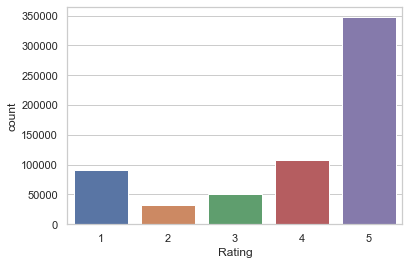

In [30]:
sns.set_theme(style="whitegrid")
#ax=sns.barplot(x=MobRevdfCp.Rating.value_counts().index, y=MobRevdfCp.Rating.value_counts())
ax=sns.countplot(x='Rating', data=MobRevdfCp)

# Unique Sentiment Counts

In [31]:
#For unique count of your rows without duplications

#MobRevdfCp['Sentiment'].nunique()

#To know the number of each unique row content duplicated

MobRevdfCp['Sentiment'].value_counts()

POSITIVE    455840
NEGATIVE    123399
NEUTRAL      50200
Name: Sentiment, dtype: int64

# SeaBorn Bar Plot For Sentiments

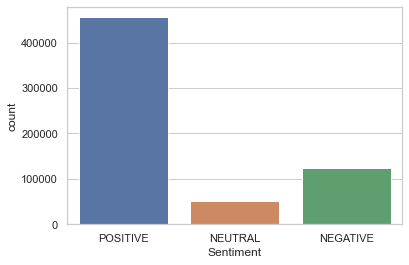

In [32]:
sns.set_theme(style="whitegrid")
#ax=sns.barplot(x=MobRevdfCp.Sentiment.value_counts().index, y=MobRevdfCp.Sentiment.value_counts())
ax=sns.countplot(x='Sentiment', data=MobRevdfCp)

# Creating WordCloud For Single Review

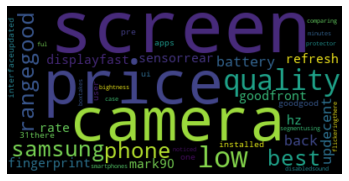

In [33]:
# Start with one review:
text = MobRevdfCp.Reviews[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

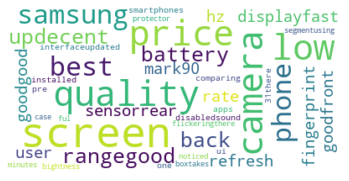

In [34]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Saving WordCloud To File

In [35]:
# Save the image in the img folder:
wordcloud.to_file("first_review_word_cloud.png")

# Creating WordCloud Text For All Reviews

In [36]:
text = " ".join(review for review in MobRevdfCp.Reviews)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 68036630 words in the combination of all review.


# Stop Words

In [37]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["phone", "new", "card", "use", "buy", "dont", "product", 
                  "bought","samsung", "galaxy","ok", "device", "one","4g","lte","call","set",
                  "amazon","sim","purchased","number","sony","htc","app","go","put","may",
                  "give","im","point","mobile","see","wife","window","slot","model","first",
                  "got","still","seller","want","around","setting","another",
                  "iphone","try","blackberry","reason","instead","nokia","find","part",
                  "company","verizon","tmobile","sd","far","take","anything","ye","phones","etc","cant","item"
                  "come","ive","blu","alway","came","u","return","cell","feature","said"])

print("Total stop words are : ",len(stopwords))

Total stop words are :  265


# Configuring Word Cloud With Settings

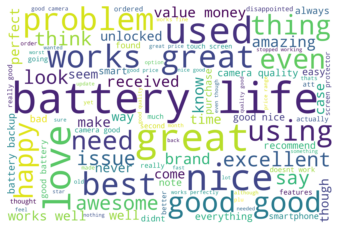

In [38]:
samsung_review_mask = np.array(Image.open("chat_mask.png"))


# Generate a word cloud image
#wordcloud = WordCloud(repeat=False,max_words=1000,width=3000,height=2000,collocations="False",stopwords=stopwords,background_color="white", mask=samsung_review_mask).generate(text)

wordcloud = WordCloud(repeat=False,max_words=100,width=3000,height=2000,collocations="False",stopwords=stopwords, 
                      background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Saving WordCloud To File

In [39]:
# Save the image in the img folder:
wordcloud.to_file("all_reviews_word_cloud.png")